## Potential Temperature and Salinity biases

In [1]:
%%capture 
# comment above line to see details about the run(s) displayed
from misc import *
%matplotlib inline

### Horizontal Mean bias (w.r.t. obs) versus time

#### Potential temperature

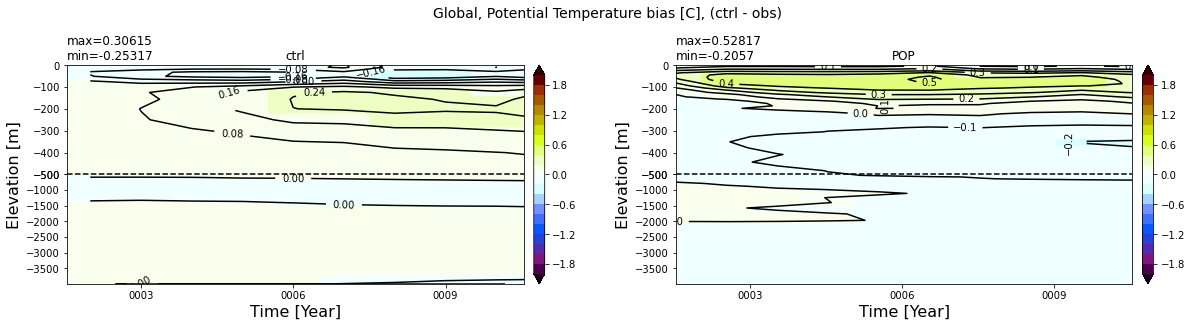

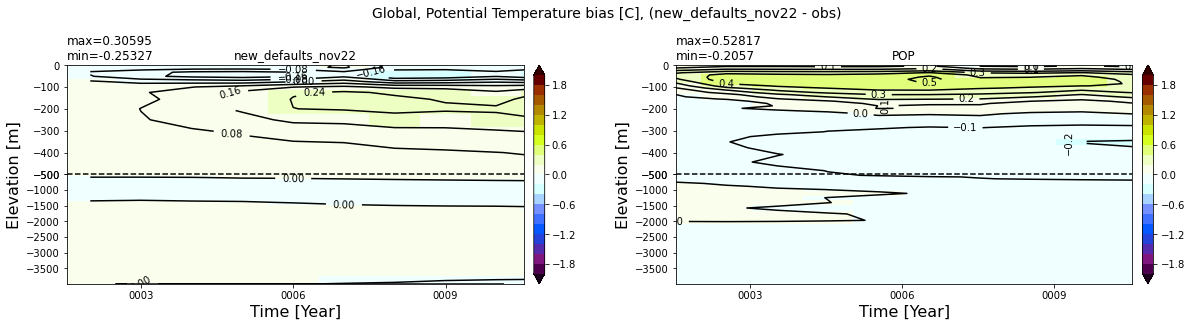

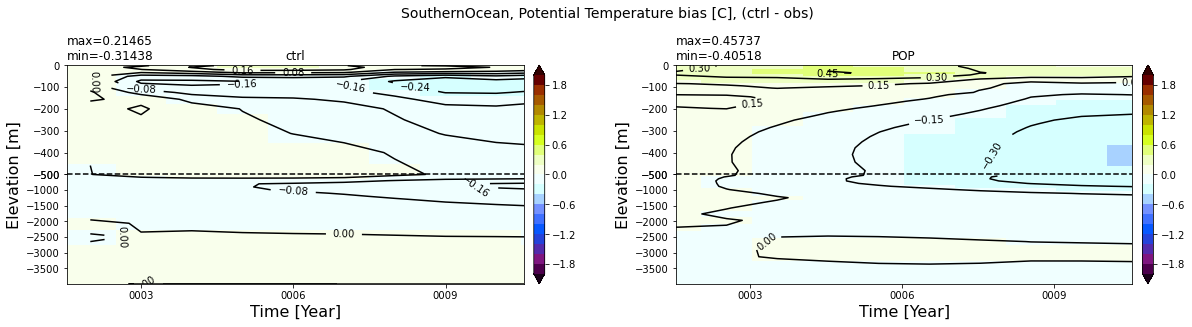

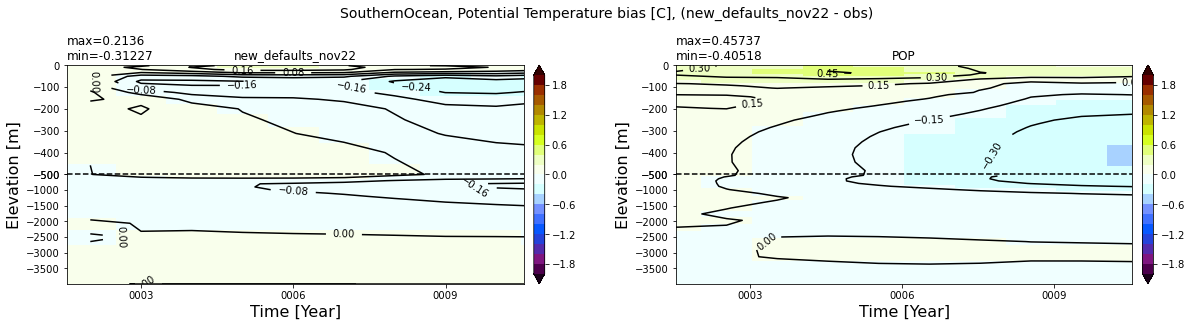

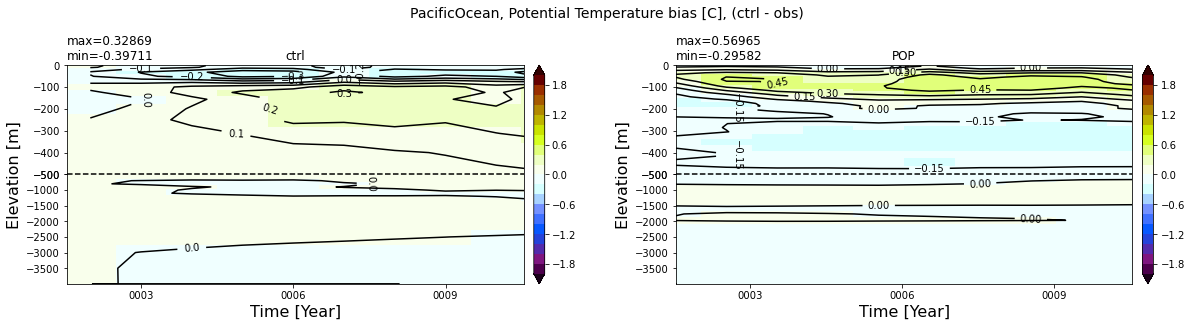

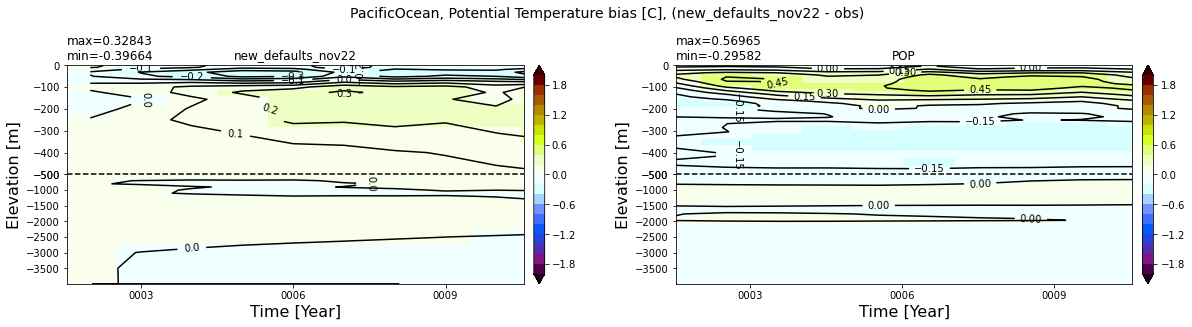

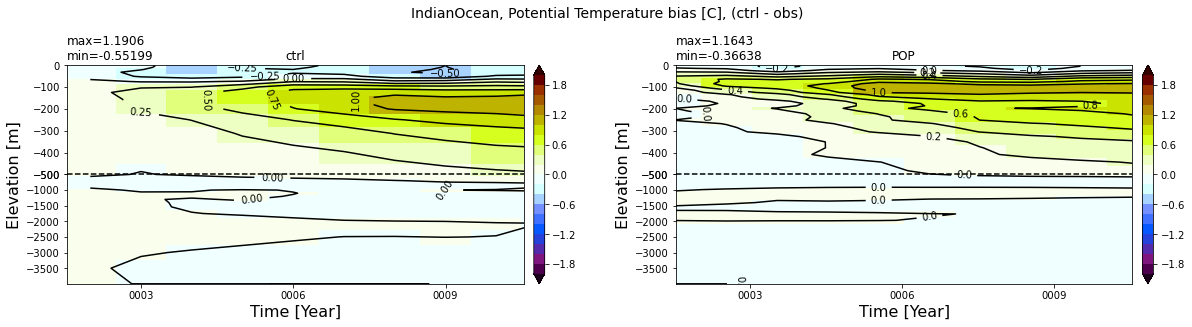

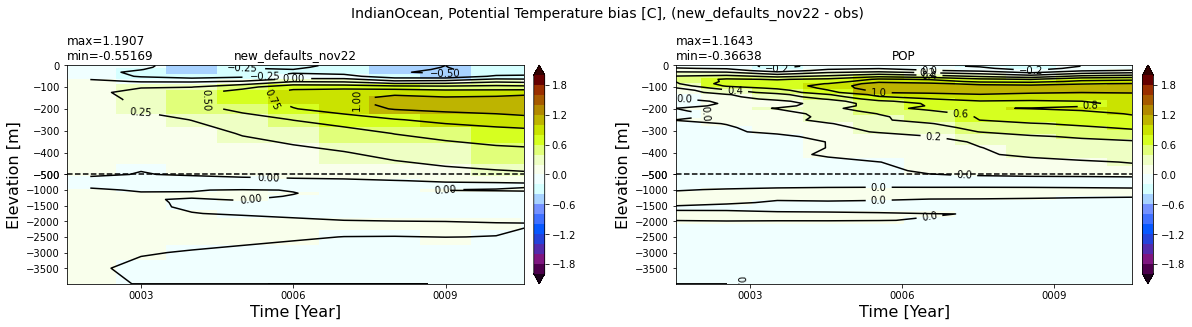

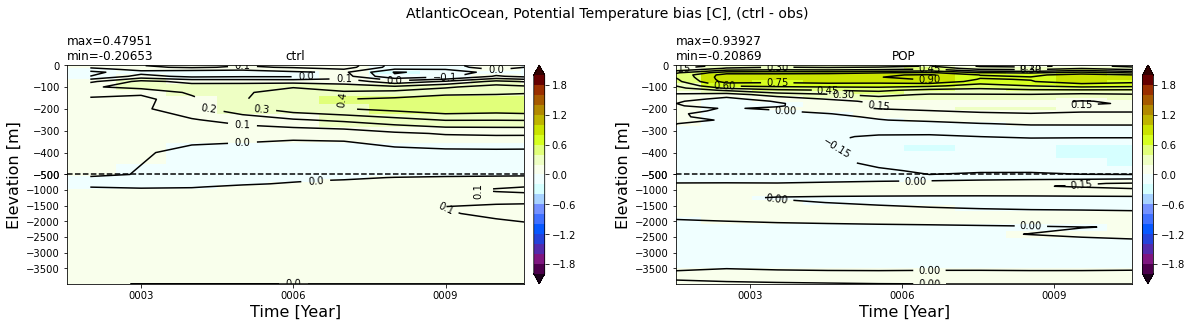

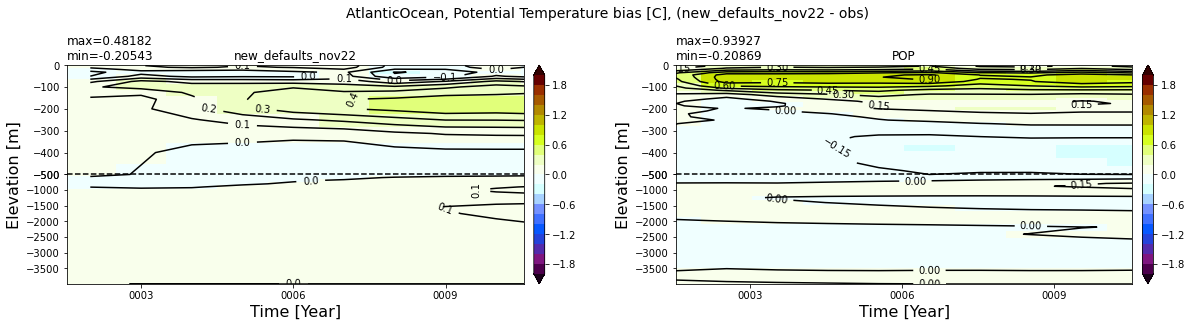

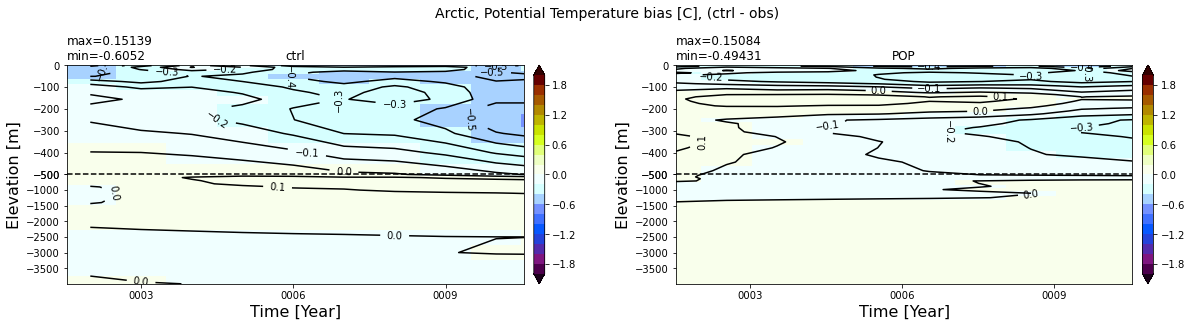

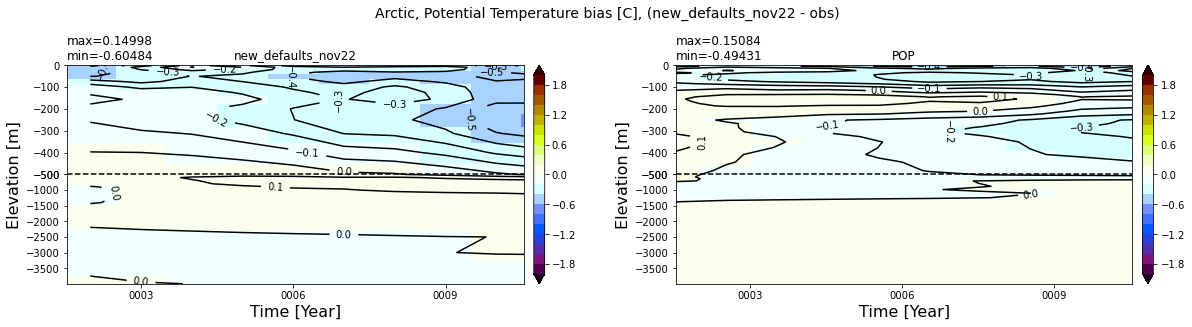

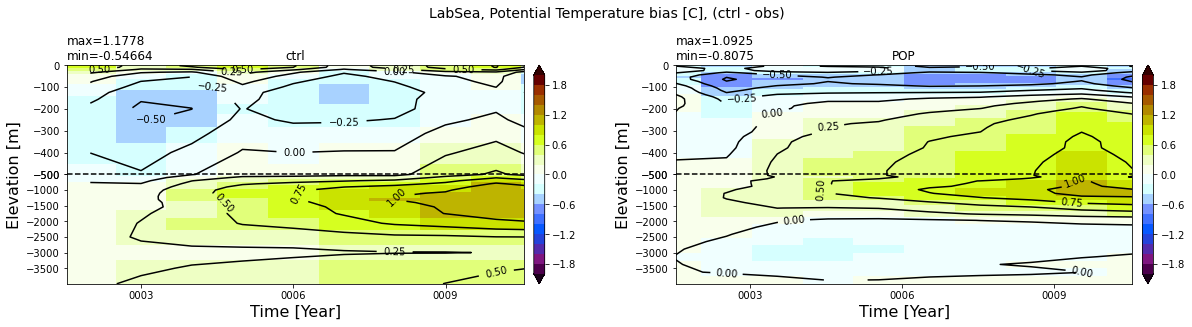

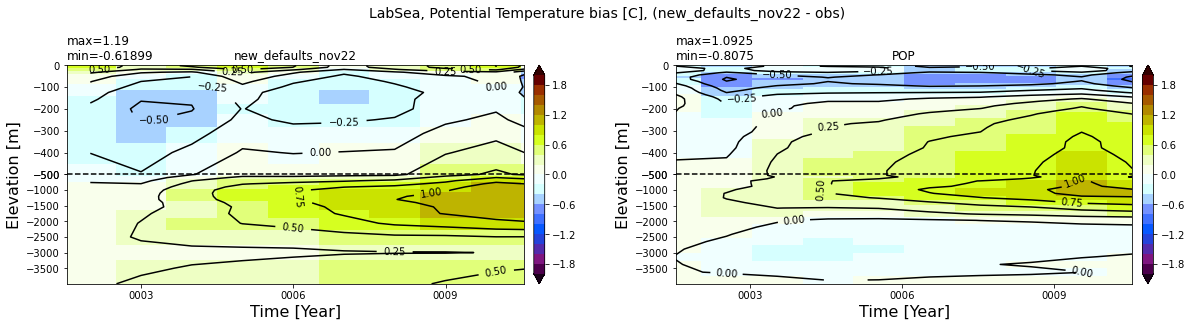

In [2]:
%matplotlib inline

reg_mom = ['Global','SouthernOcean','PacificOcean','IndianOcean','AtlanticOcean','Arctic','LabSea']
reg_pop = [0,1,2,3,6,10,8]
ds_pop = xr.open_dataset('/glade/scratch/gmarques/g210.GIAF_JRA.v13.gx1v7.01_temp_bias.nc').sel(time=slice('0001-01-01', 
                                                                                                           end_date))
vmax=2; vmin=-vmax
for m,p in zip(reg_mom,reg_pop):
  for path, case, i in zip(ocn_path, casename, range(len(casename))):
    ds_mom = xr.open_dataset(path+case+'_thetao_drift.nc').sel(time=slice('0001-01-01', end_date))
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,4.5), sharex=True)
    plt.suptitle(str(m)+', Potential Temperature bias [C], ({} - obs)'.format(label[i]), fontsize=14)
    splitscale =  [0., -500., -4000]
    dummy_mom = np.ma.masked_invalid(ds_mom.sel(region=m).thetao_drift.values)
    dummy_pop = np.ma.masked_invalid(ds_pop.__xarray_dataarray_variable__.sel(region=str(p)).values)

    dummy_pop = np.ma.masked_invalid(ds_pop.sel(region=str(p)).__xarray_dataarray_variable__.values)

    ztplot(dummy_mom, ds_mom.time.values, ds_mom.z_l.values*-1, ignore=np.nan, splitscale=splitscale, 
           contour=True, axis=ax.flat[0] , title=label[i], extend='both', colormap='dunnePM', 
           autocenter=True, tunits='Year', show=False, clim=(vmin, vmax)) 
    ztplot(dummy_pop, ds_pop.time.values, -ds_pop.z_l.values/100., ignore=np.nan, splitscale=splitscale, 
           contour=True, axis=ax.flat[1] , title='POP', extend='both', colormap='dunnePM', 
           autocenter=True, tunits='Year', show=False, clim=(vmin, vmax))
    plt.subplots_adjust(top = 0.8)

#### Salinity

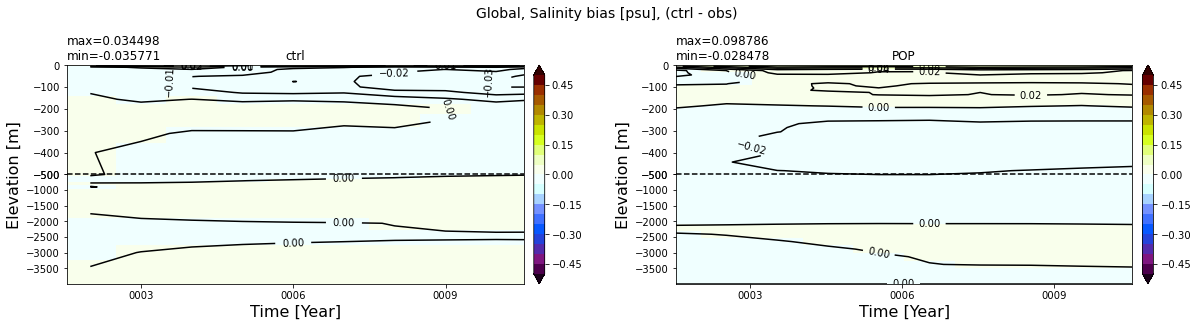

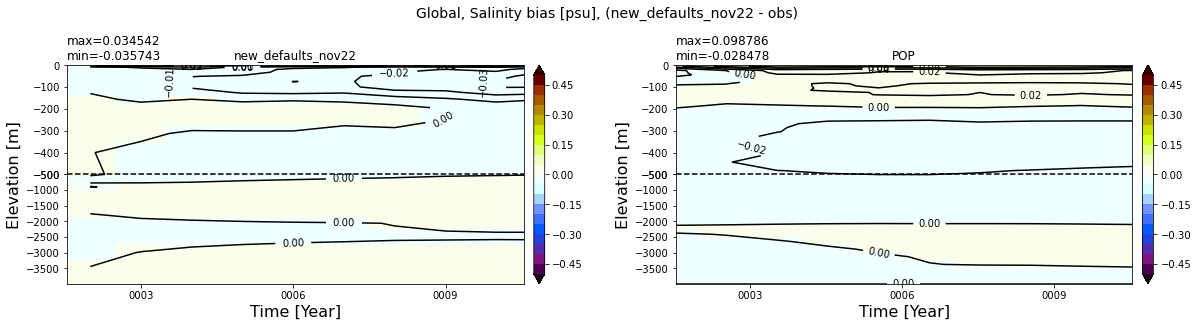

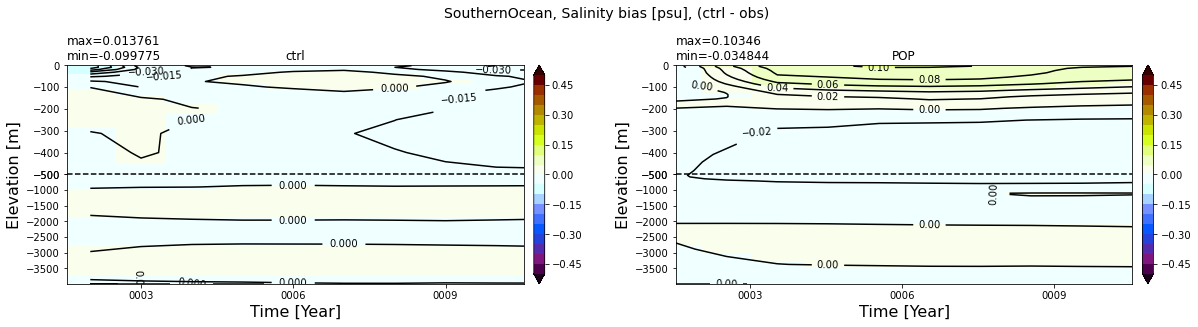

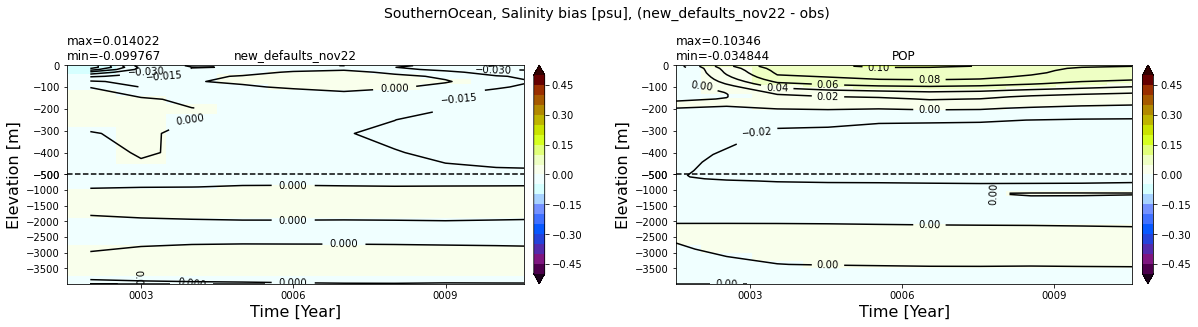

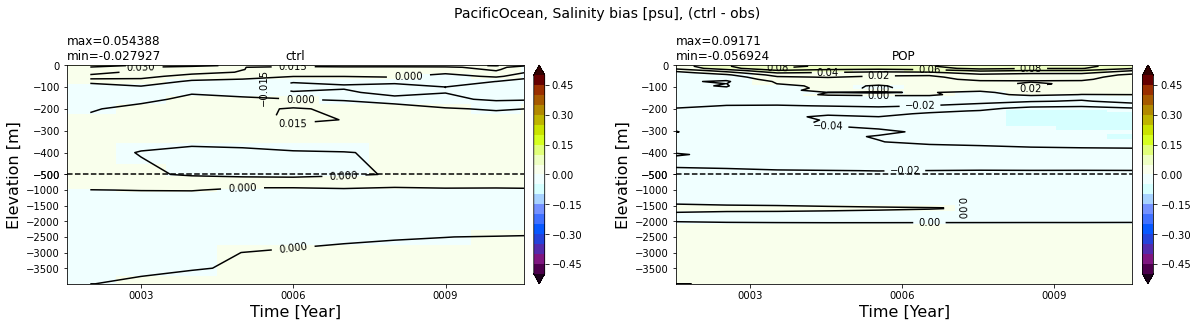

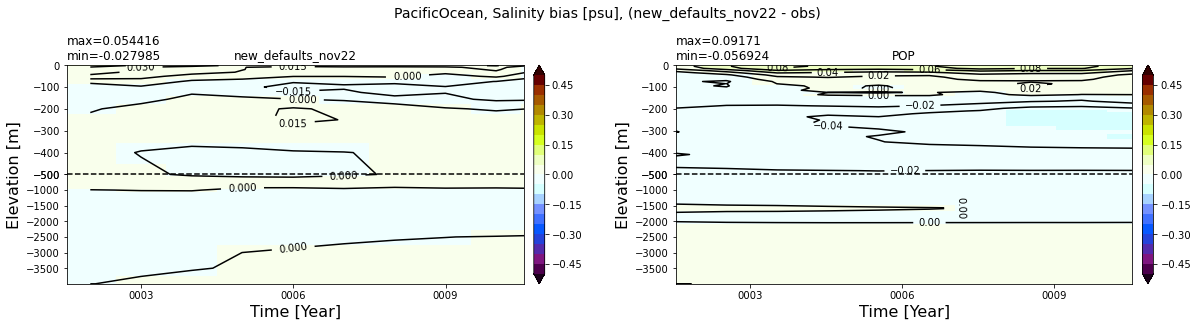

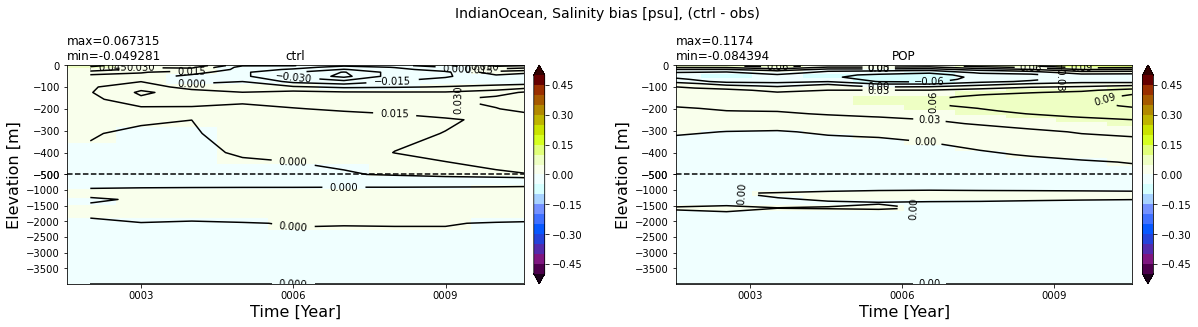

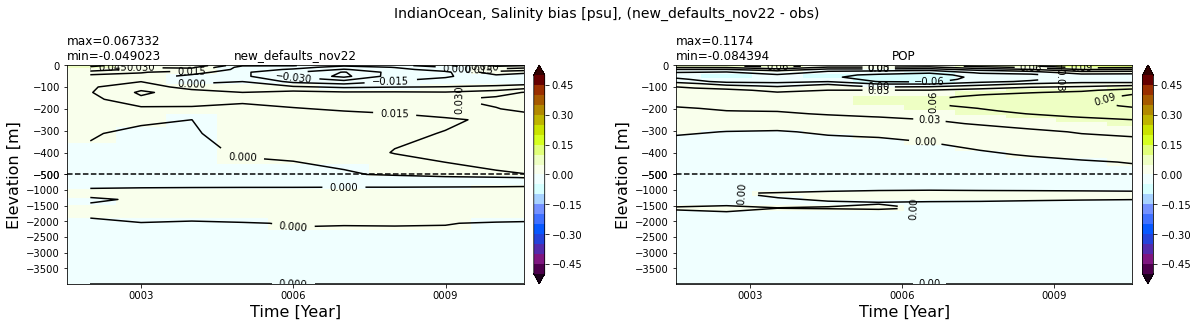

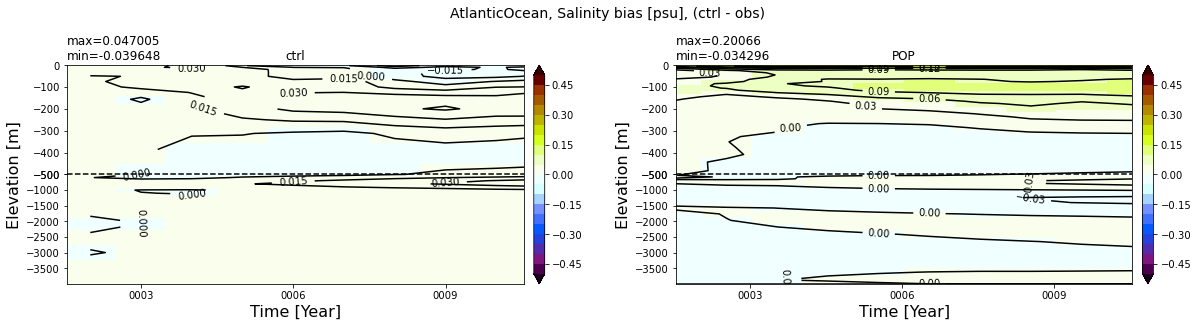

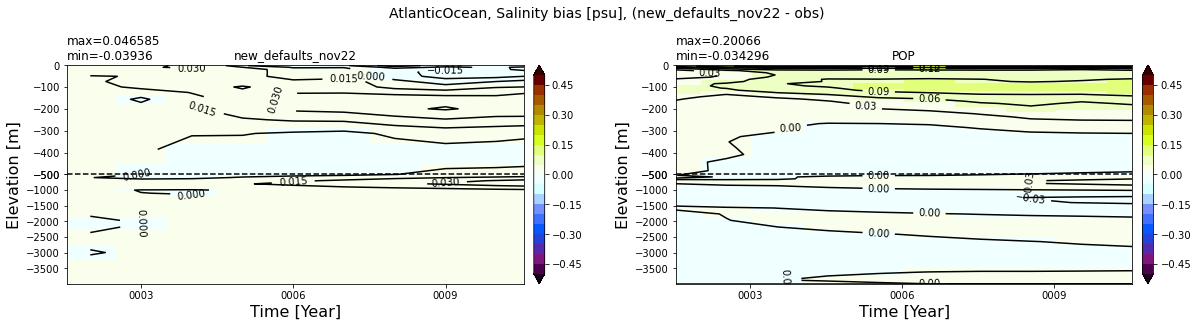

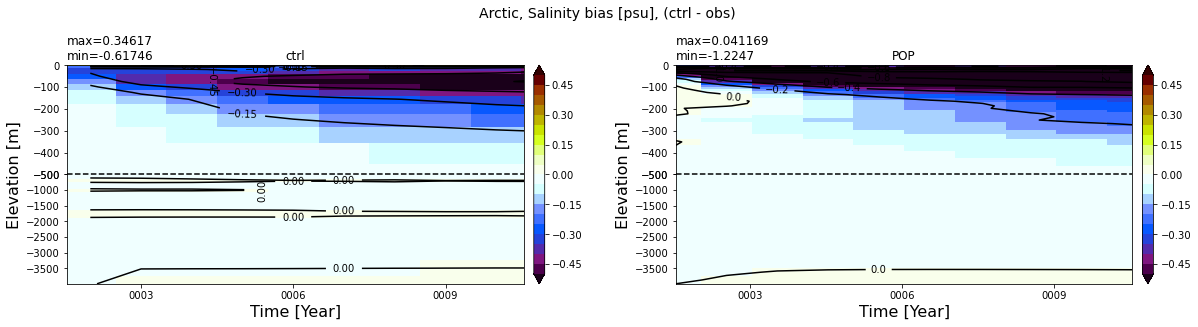

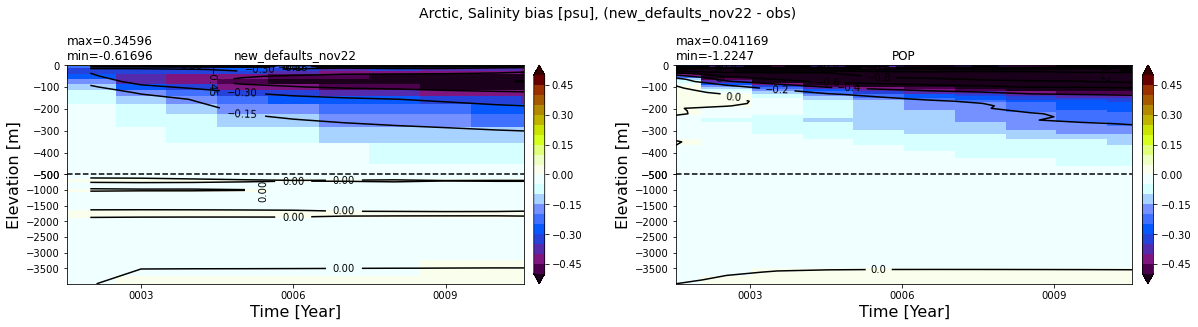

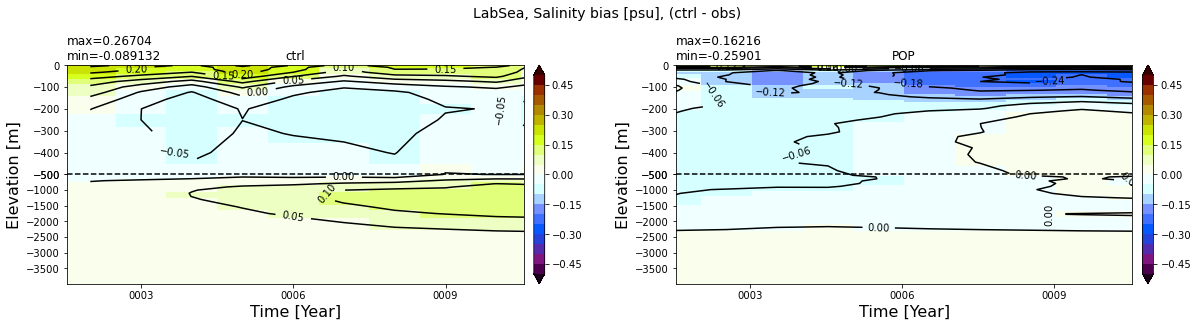

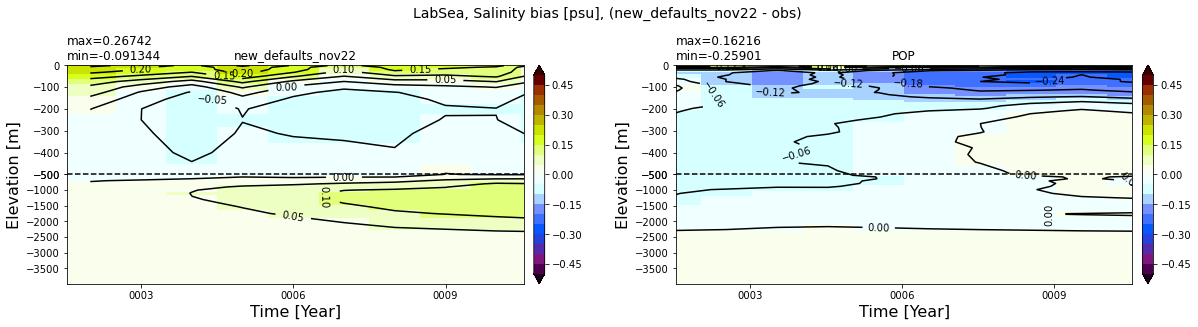

In [3]:
ds_pop = xr.open_dataset('/glade/scratch/gmarques/g210.GIAF_JRA.v13.gx1v7.01_salt_bias.nc').sel(time=slice('0001-01-01', 
                                                                                                           end_date))
vmax= 0.5
vmin= -vmax

for m,p in zip(reg_mom,reg_pop):
  for path, case, i in zip(ocn_path, casename, range(len(casename))):
    ds_mom = xr.open_dataset(path+case+'_so_drift.nc').sel(time=slice('0001-01-01', end_date))
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,4.5), sharex=True)
    plt.suptitle(str(m)+', Salinity bias [psu], ({} - obs)'.format(label[i]), fontsize=14)
    splitscale =  [0., -500., -4000]
    dummy_mom = np.ma.masked_invalid(ds_mom.sel(region=m).so_drift.values)
    dummy_pop = np.ma.masked_invalid(ds_pop.__xarray_dataarray_variable__.sel(region=str(p)).values)

    dummy_pop = np.ma.masked_invalid(ds_pop.sel(region=str(p)).__xarray_dataarray_variable__.values)

    ztplot(dummy_mom, ds_mom.time.values, ds_mom.z_l.values*-1, ignore=np.nan, splitscale=splitscale, 
         contour=True, axis=ax.flat[0] , title=label[i], extend='both', colormap='dunnePM', 
         autocenter=True, tunits='Year', show=False, clim=(vmin, vmax)) 
    ztplot(dummy_pop, ds_pop.time.values, -ds_pop.z_l.values/100., ignore=np.nan, splitscale=splitscale, 
         contour=True, axis=ax.flat[1] , title='POP', extend='both', colormap='dunnePM', 
         autocenter=True, tunits='Year', show=False, clim=(vmin, vmax))  
    plt.subplots_adjust(top = 0.8)

### T/S bias at selected vertical levels

In [4]:
# load PHC2 data
phc_path = '/glade/p/cesm/omwg/obs_data/phc/'
phc_temp_mom = xr.open_mfdataset(phc_path+'PHC2_TEMP_tx0.66v1_34lev_ann_avg.nc', 
                             decode_coords=False, decode_times=False)
phc_salt_mom = xr.open_mfdataset(phc_path+'PHC2_SALT_tx0.66v1_34lev_ann_avg.nc', 
                             decode_coords=False, decode_times=False)

phc_temp_pop = pop_add_cyclic(xr.open_dataset(phc_path+'PHC2_TEMP_gx1v7_60lev_ann_avg.nc', 
                             decode_coords=False, decode_times=False).rename({'Y': 'nlat','TEMP':'thetao',
                    'X':'nlon'}).assign_coords({'TLAT': pop_grid.TLAT, 'TLONG':pop_grid.TLONG}).drop('nlat').drop('nlon'))
phc_salt_pop = pop_add_cyclic(xr.open_dataset(phc_path+'PHC2_SALT_gx1v7_60lev_ann_avg.nc', 
                             decode_coords=False, decode_times=False).rename({'Y': 'nlat','SALT':'so',
                    'X':'nlon'}).assign_coords({'TLAT': pop_grid.TLAT, 'TLONG':pop_grid.TLONG}).drop('nlat').drop('nlon'))

In [5]:
def find_nearest(array, value):
    '''Find nearest value and return its indice'''
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

#### Potential Temperature

AttributeError: type object 'MOM6_grd' has no attribute 'area_t'

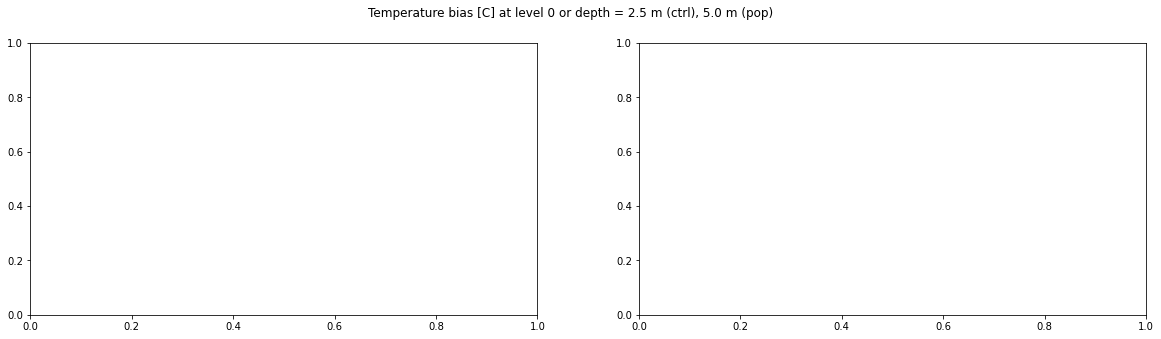

In [6]:
# change k indice to see bias at other depths
levels=[0,1,2,5,10,15,20,25]
ds_pop_t = pop_add_cyclic(xr.open_dataset('/glade/scratch/gmarques/g210.GIAF_JRA.v13.gx1v7.01_thetao_time_mean.nc').rename({'yh': 'nlat',
                    'xh':'nlon', 'z_l':'z_t'}).assign_coords({'TLAT': pop_grid.TLAT, 'TLONG':pop_grid.TLONG}).drop('nlat').drop('nlon'))
tlim=[5,7.5,7.5,5,5,5]

for k,t in zip(levels,tlim):
  for path, case, i in zip(ocn_path, casename, range(len(casename))):
    ds_mom_t = xr.open_dataset(path+case+'_thetao_time_mean.nc')
    kpop =  find_nearest(phc_salt_pop.depth.values,phc_temp_mom.depth[k].values) 
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
    ax1 = ax.flatten()
    temp_mom = np.ma.masked_invalid(ds_mom_t.thetao[k,:].values)
    temp_mom_obs = np.ma.masked_invalid(phc_temp_mom['TEMP'][k,:].values)
    temp_pop = ds_pop_t.thetao[kpop,:]
    temp_pop_obs = phc_temp_pop.thetao[kpop,:]
    pop_diff = np.ma.masked_invalid((temp_pop-temp_pop_obs).values)
  
    plt.suptitle('Temperature bias [C] at level {} or depth = {} m ({}), {} m (pop)'.format(k, 
               phc_temp_mom.depth[k].values, label[i], phc_temp_pop.depth[kpop].values))
    xyplot(temp_mom-temp_mom_obs, grd.geolon, grd.geolat, grd.area_t, title=str(label[i]+' - obs'), axis=ax1[0], 
         clim=(-t,t), nbins=100, colormap=plt.cm.bwr, centerlabels=True)
    xyplot(pop_diff, pop_grid_o.TLONG.values, pop_grid_o.TLAT.values, pop_grid_o.TAREA.values,
         title=str('pop - obs'), axis=ax1[1], 
         clim=(-t,t), nbins=100, colormap=plt.cm.bwr, centerlabels=True)
    ax1[1].set_xlim(-220,140)
    plt.subplots_adjust(top = 0.8)

#### Salinity

In [ ]:
# change k indice to see bias at other depths
levels=[0,5,10,15,20,25]
ds_pop_s = pop_add_cyclic(xr.open_dataset('/glade/scratch/gmarques/g210.GIAF_JRA.v13.gx1v7.01_so_time_mean.nc').rename({'yh': 'nlat',
                    'xh':'nlon', 'z_l':'z_t'}).assign_coords({'TLAT': pop_grid.TLAT, 'TLONG':pop_grid.TLONG}).drop('nlat').drop('nlon'))
slim=[5,3,1.5,1.5,1,1]

for k,s in zip(levels,slim):
  for path, case, i in zip(ocn_path, casename, range(len(casename))):
    ds_mom_s = xr.open_dataset(path+case+'_so_time_mean.nc')
    kpop =  find_nearest(phc_salt_pop.depth.values,phc_temp_mom.depth[k].values)  
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5.))
    ax1 = ax.flatten()
    salt_mom = np.ma.masked_invalid(ds_mom_s.so[k,:].values)
    salt_mom_obs = np.ma.masked_invalid(phc_salt_mom['SALT'][k,:].values)
    salt_pop = ds_pop_s.so[kpop,:]
    salt_pop_obs = phc_salt_pop.so[kpop,:]
    pop_diff = np.ma.masked_invalid((salt_pop-salt_pop_obs).values)

    plt.suptitle('Salinity bias [psu] at level {} or depth = {} m ({}), {} m (pop)'.format(k, 
               phc_salt_mom.depth[k].values, label[i], phc_salt_pop.depth[kpop].values))
    xyplot(salt_mom-salt_mom_obs, grd.geolon, grd.geolat, grd.area_t, title=str(label[i]+' - obs'), axis=ax1[0], 
         clim=(-s,s), nbins=50, colormap=plt.cm.bwr, centerlabels=True)
    xyplot(pop_diff, pop_grid_o.TLONG.values, pop_grid_o.TLAT.values, pop_grid_o.TAREA.values, 
         title=str('pop - obs'), axis=ax1[1], 
         clim=(-s,s), nbins=50, colormap=plt.cm.bwr, centerlabels=True)
    ax1[1].set_xlim(-220,140)
    plt.subplots_adjust(top = 0.8)